In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
ufo_df = pd.read_excel('data/UFOs_coord.xlsx')
df.head()

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date / Time  5177 non-null   object 
 1   Country      5177 non-null   object 
 2   City         5177 non-null   object 
 3   State        5177 non-null   object 
 4   Shape        5177 non-null   object 
 5   Summary      5177 non-null   object 
 6   lat          5177 non-null   float64
 7   lng          5177 non-null   float64
dtypes: float64(2), object(6)
memory usage: 323.7+ KB


In [6]:
df.describe()

,lat,lng
count,5177.000000,5177.000000
mean,38.594944,-94.892339
std,5.800210,18.442668
min,19.062767,-162.597762
25%,34.225728,-112.298280
50%,39.049011,-88.351460
75%,42.360816,-80.124767
max,66.898206,-60.087349


In [7]:
df.nunique()

Date / Time    4483
Country           2
City           2626
State            59
Shape            21
Summary        5154
lat            2982
lng            2983
dtype: int64

/tmp/ipykernel_62626/3303608179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Shape', data=ufo_df, order=ufo_df['Shape'].value_counts().index, palette='inferno')


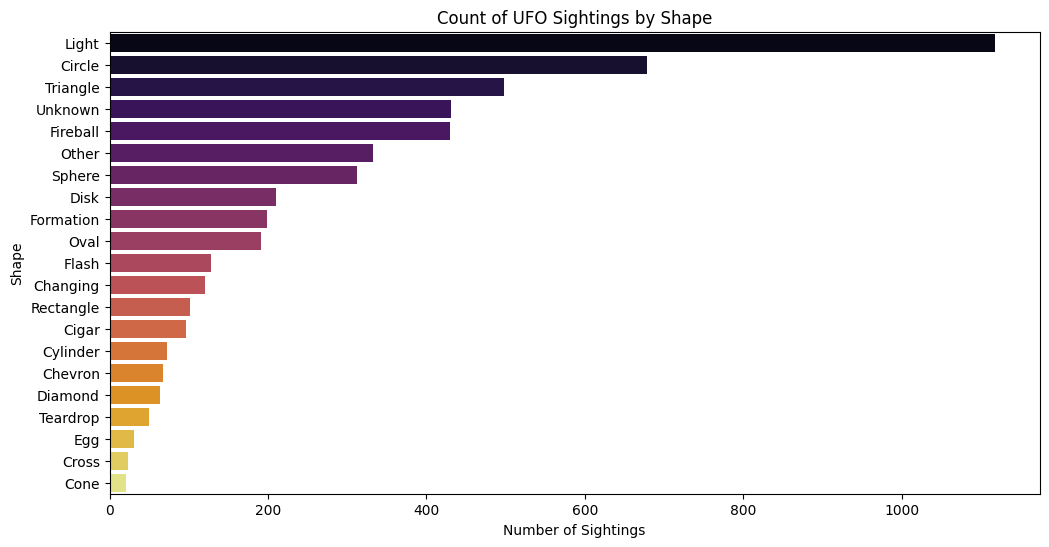

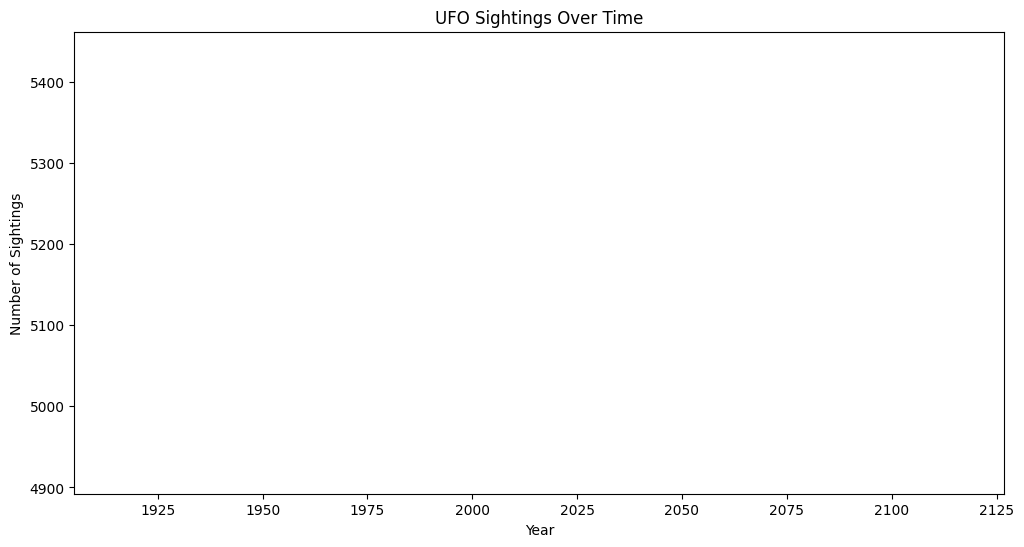

In [19]:
ufo_df['Date / Time'] = pd.to_datetime(ufo_df['Date / Time'])

# Plot 1: Count of Sightings by Shape
plt.figure(figsize=(12, 6))
sns.countplot(y='Shape', data=ufo_df, order=ufo_df['Shape'].value_counts().index, palette='inferno')
plt.title('Count of UFO Sightings by Shape')
plt.xlabel('Number of Sightings')
plt.ylabel('Shape')
plt.show()

# Plot 2: Sightings Over Time (by Year)
ufo_df['Year'] = ufo_df['Date / Time'].dt.year
plt.figure(figsize=(12, 6))
ufo_df.groupby('Year').size().plot(kind='line')
plt.title('UFO Sightings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()

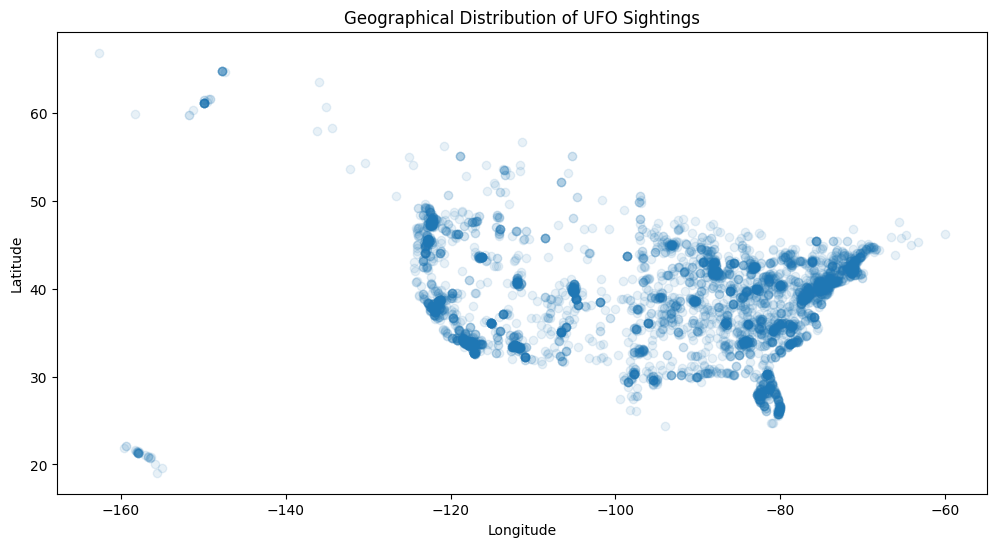

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(ufo_df['lng'], ufo_df['lat'], alpha=0.1)
plt.title('Geographical Distribution of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipykernel_62626/3925882060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='State', data=ufo_df, order=ufo_df['State'].value_counts().index, palette='viridis')
/tmp/ipykernel_62626/3925882060.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


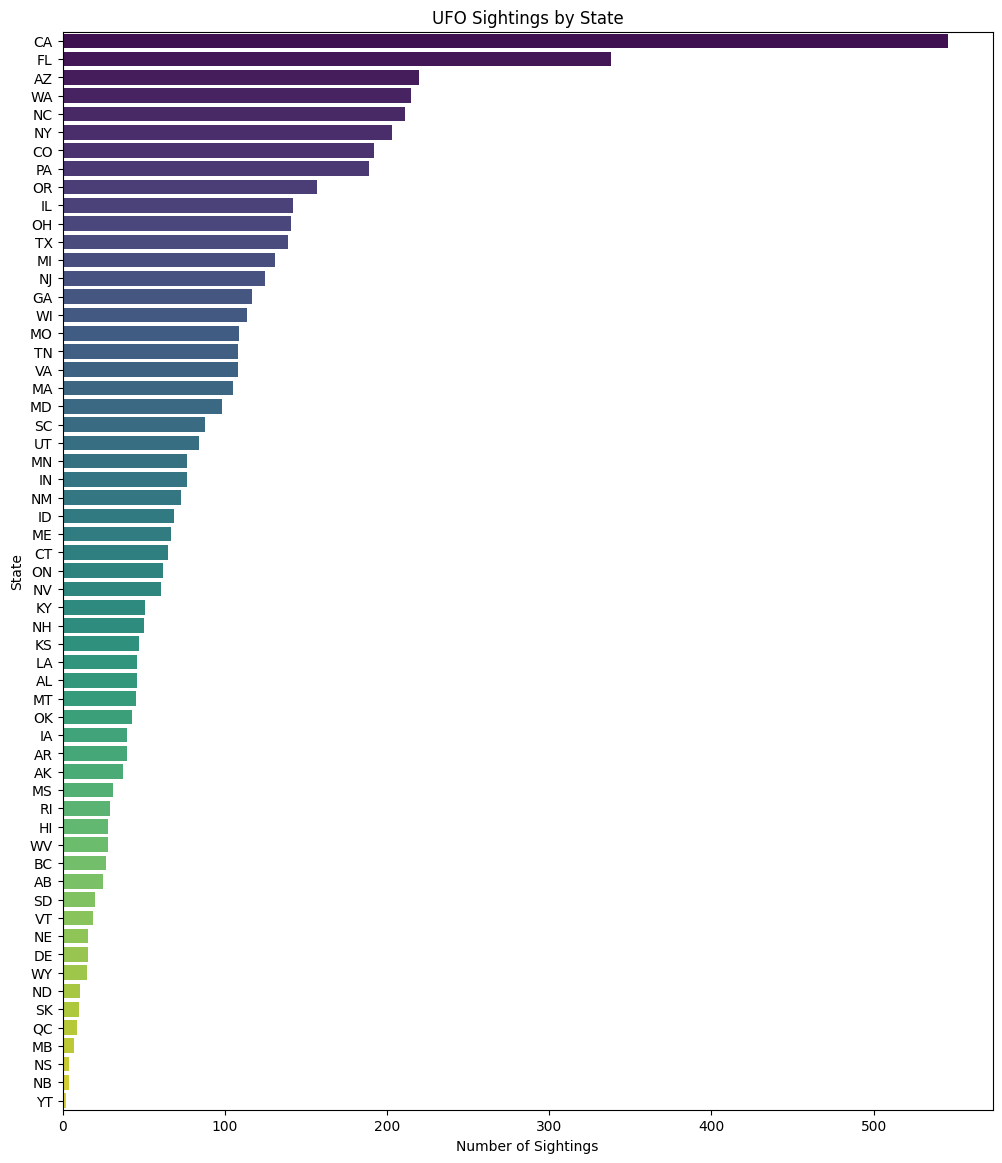

In [21]:
plt.figure(figsize=(12, 14))
ax = sns.countplot(y='State', data=ufo_df, order=ufo_df['State'].value_counts().index, palette='viridis')
plt.title('UFO Sightings by State')
plt.xlabel('Number of Sightings')
plt.ylabel('State')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
plt.show()

In [23]:
ufo_df.to_csv('data/UFOs_coord.csv', index=False)